<h1>E11 Phasenbeziehungen in Reihenschaltkreisen</h1>

Simon Legtenborg, Leonie Parsiegel<br>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,8)

<h2>Aufgabenstellung</h2>

<h3>1. Messung der Phasenbeziehung in Reihenschaltkreisen</h3>

Messen Sie die Phasenverschiebung $\varphi$ zwischen Strom und Spannung als Funktion der Frequenz für die folgenden Schaltungen:
<ol>
    <li> RCL-Reihenschaltung</li>
    <li> RC-Reihenschaltung</li>
    <li> RL-Reihenschaltung</li>
</ol>

<h3>2. Analyse der Messergebnisse und Bestimmung der Schaltungsparameter</h3

<ol>
    <li>Stellen Sie die Phasenwinkel für die drei Schaltungen in einem gemeinsamen Diagramm als
        Funktion der Frequenz (in logarithmischer Teilung) graphisch dar.</li>
    <li>Bestimmen Sie den Reihenwiderstand aus der Phasenverschiebung der RC-Schaltung</li>
    <li> Bestimmen Sie die Induktivität der Spule
        <ul>
            <li>aus der Resonanzfrequenz der RCL-Reihenschaltung</li>
            <li>durch Anpassen der Theoriekurve an die Daten der RL-Reihenschaltung.</li>
        </ul>
    </li>
    <li>Fitten Sie die Theoriekurve an die Daten der RCL-Reihenschaltung an, indem Sie den
        Reihenwiderstand als Fitparameter verwenden.</li>
</ol>

<h2>Messungen</h2>

<h3> RCL-Reihenschaltung </h3>

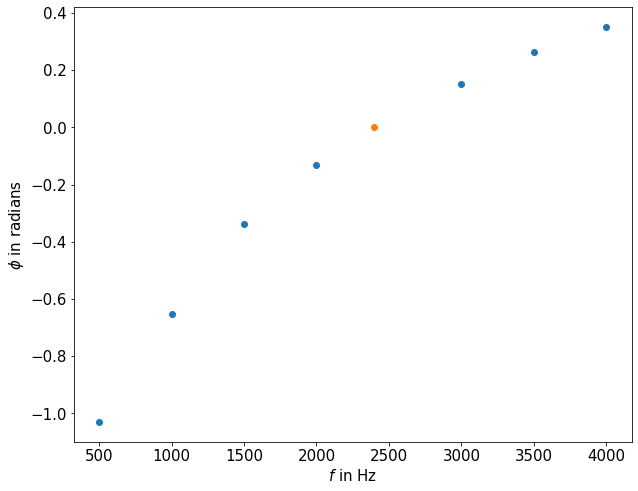

In [11]:
#Messdaten
f1 = np.array([500,1000,1500,2000,3000,3500,4000])
dt1 = np.array([-328,-104,-36,-10.6,8,12,14])*10**-6
phi1 = 2*np.pi*f1*dt1



plt.scatter(f1,phi1)
plt.scatter(2400,0)
plt.xlabel(f"$f$ in Hz")
plt.ylabel(f"$ \phi$ in radians")
plt.show()

<h3>RC-Reihenschaltung</h3>

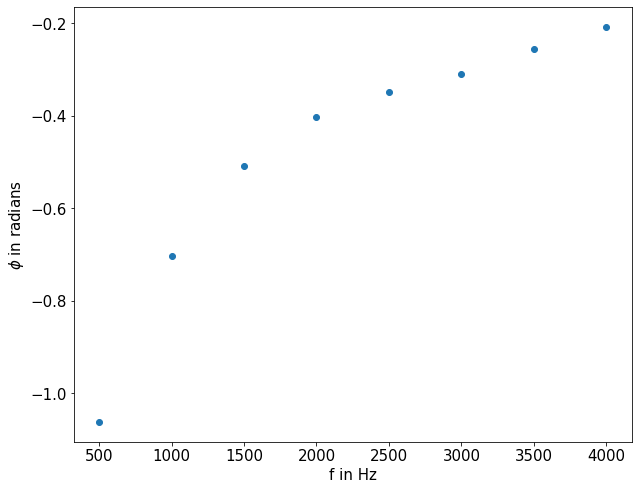

In [12]:
#Messdaten
f2 = np.array([500,1000,1500,2000,2500,3000,3500,4000])
dt2 = np.array([338,112,54,32,22.2,16.4,11.6,8.24])*10**-6
phi2 = -2*np.pi*f2*dt2


plt.scatter(f2,phi2)
plt.xlabel(f"f in Hz")
plt.ylabel(f"$\phi$ in radians")
plt.show()

<h3>RL-Reihenschaltung</h3>

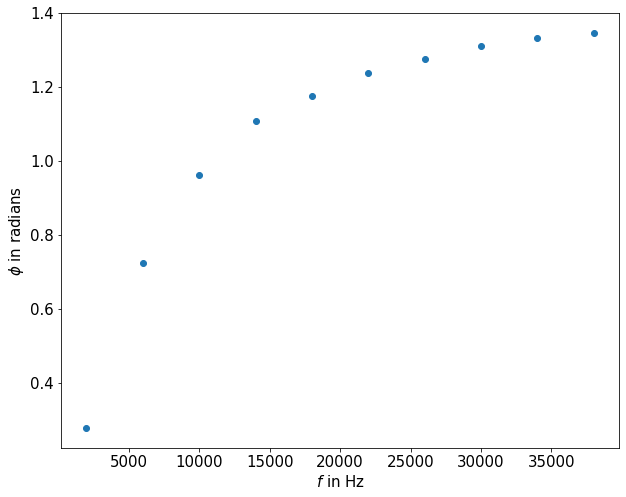

In [13]:
f3=np.array([2000,6000,10000,14000,18000,22000,26000,30000,34000,38000])
dt3 = np.array([22.1,19.2,15.3,12.6,10.4,8.96,7.8,6.96,6.24,5.64])*10**-6
phi3 = 2*np.pi*f3*dt3


plt.scatter(f3,phi3)
plt.xlabel(f"$f$ in Hz")
plt.ylabel(f"$ \phi$ in radians")
plt.show()

<h2>Auswertung</h2>

In [14]:
C = 1.03e-6 #Kapazität des Kondensators in Farad
f_res = 2400 #Resonanzfrequenz in Hz

<h3>Aufgabe 1</h3>

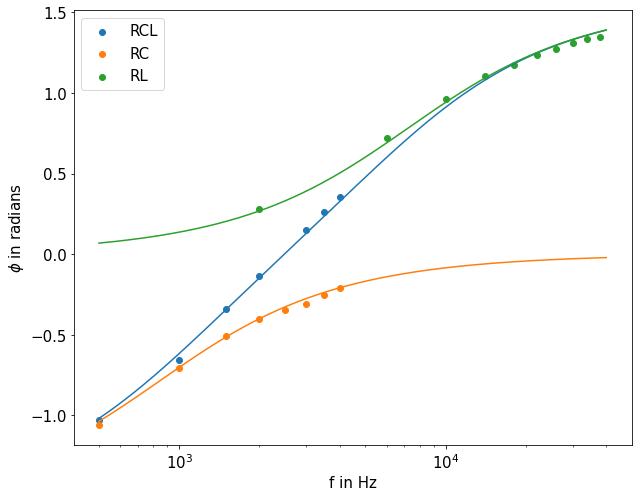

In [15]:
L=0.004
R=182.6

f_t=np.linspace(500,40000,4000)

RCL=np.arctan((2*np.pi*f_t*L-1/(2*np.pi*f_t*C))/R)
plt.scatter(f1,phi1, label="RCL")
plt.plot(f_t,RCL)

RC= -np.arctan(1/(2*np.pi*f_t*C*R))
plt.scatter(f2,phi2, label="RC")
plt.plot(f_t,RC)

RL=np.arctan(2*np.pi*f_t*L/R)
plt.scatter(f3,phi3, label="RL")
plt.plot(f_t,RL)
plt.xlabel(f"f in Hz")
plt.ylabel(f"$\phi$ in radians")
plt.xscale('log')
plt.legend()
plt.show()

<h3>Aufgabe 2</h3>

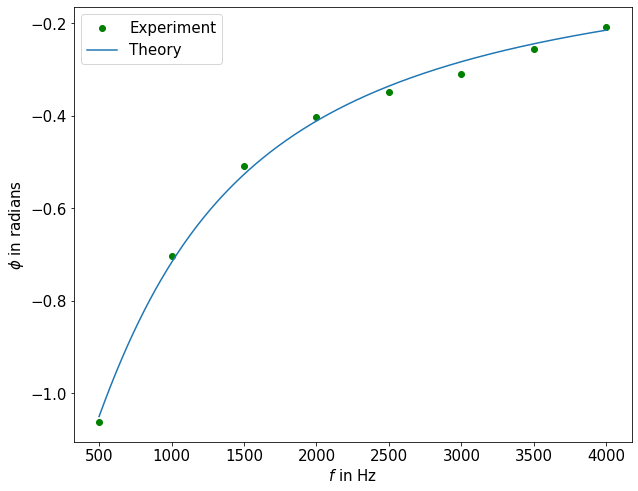

Reihenwiderstand: 177.2817661973389 +- 2.771452976561386  Ohm


In [16]:
def theory(f,R):
    return -np.arctan(1/(2*np.pi*f*C*R))
R, cov = curve_fit(theory, f2, phi2)

f_t=np.linspace(500,4000,2000)

plt.scatter(f2,phi2, color="green", label="Experiment")
plt.plot(f_t,theory(f_t,R), label="Theory")
plt.xlabel(f"$f$ in Hz")
plt.ylabel(f"$ \phi$ in radians")
plt.legend()
plt.show()
print(f"Reihenwiderstand: {R[0]} +- {np.sqrt(cov[0,0])}  Ohm")

<h3>Aufgabe 3.1</h3>

Finden wir die Resonanzfrequenz, so gilt:<br>
$\begin{align*}
    2\cdot \pi\cdot f_0=\frac{1}{\sqrt{L \cdot C}}
\end{align*}$ <br>
Damit folgt für unsere Induktivität:<br>
$\begin{align*}
   L=\frac{1}{4\pi^2\cdot f_0^2\cdot C}
\end{align*}$ <br>
Mit $f_0=2400Hz$ und $C=10^{-6}F$ ergibt sich eine Induktivität von $L=4.4\cdot 10^{-3}$

<h3>Aufgabe 3.2</h3>

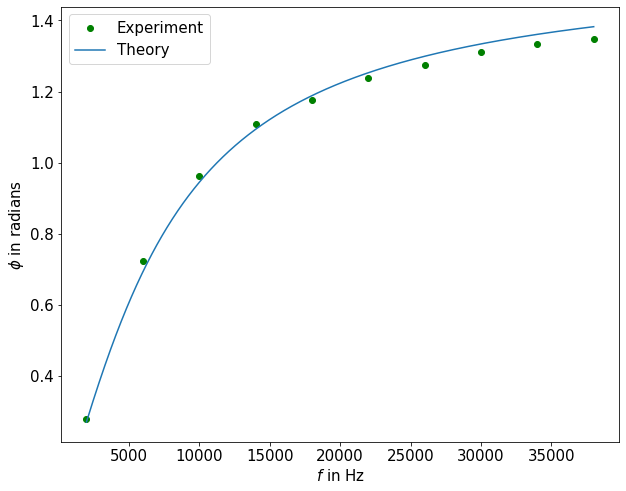

Induktivität: 0.0038960231728483626 +-8.86098011733876e-05 Henry 


In [17]:
def theory(f,L):
    return np.arctan(2*np.pi*f*L/R)
L, cov = curve_fit(theory, f3, phi3,p0=10**-3)

f_t=np.linspace(2000,38000,2000)

plt.scatter(f3,phi3, color="green", label="Experiment")
plt.plot(f_t,theory(f_t,L), label="Theory")
plt.xlabel(f"$f$ in Hz")
plt.ylabel(f"$ \phi$ in radians")
plt.legend()
plt.show()
print(f"Induktivität: {L[0]} +-{np.sqrt(cov[0,0])} Henry ")

<h3>Aufgabe 4</h3>

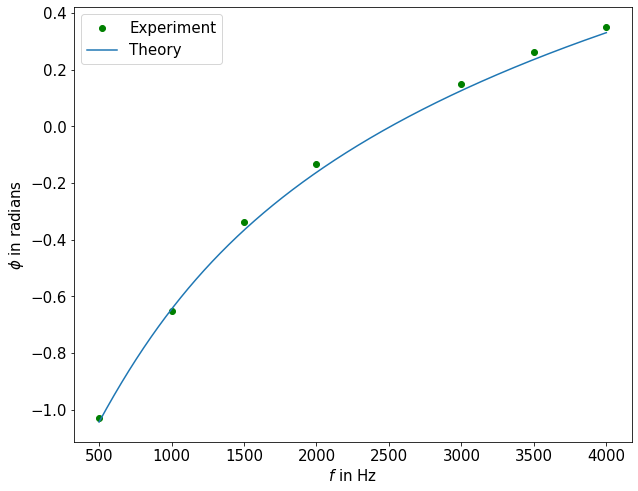

Reihenwiderstand: 172.6557346873425 +-5.032167247268546 Ohm 


In [18]:
def theory(f,R):
    return np.arctan((2*np.pi*f*L-1/(2*np.pi*f*C))/R)
R2, cov = curve_fit(theory, f1, phi1)

f_t=np.linspace(500,4000,2000)

plt.scatter(f1,phi1, color="green", label="Experiment")
plt.plot(f_t,theory(f_t,R2), label="Theory")
plt.xlabel(f"$f$ in Hz")
plt.ylabel(f"$ \phi$ in radians")
plt.legend()
plt.show()
print(f"Reihenwiderstand: {R2[0]} +-{np.sqrt(cov[0,0])} Ohm ")